In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

# Frequency Calculations

In [2]:
LETTERS = 'abcdefghijklmnopqrstuvwxyz*@.<'
LETTERS_INDEX = dict([el[::-1] for el in enumerate(LETTERS)])

In [3]:
dictionary = []
with open('words_alpha.txt') as f:
    for word in f.readlines():
        dictionary.append(word.strip())

In [4]:
letter_frequency = np.zeros(26)
transition_frequency = np.zeros((26, 26))

for word in dictionary:
    for i in range(len(word) - 1):
        letter_frequency[LETTERS_INDEX[word[i]]] += 1
        transition_frequency[LETTERS_INDEX[word[i]]][LETTERS_INDEX[word[i + 1]]] += 1

In [5]:
letter_frequency_normalized = letter_frequency / sum(letter_frequency)

In [6]:
letter_frequency_normalized_extended = np.concatenate((letter_frequency_normalized, np.zeros(4)))

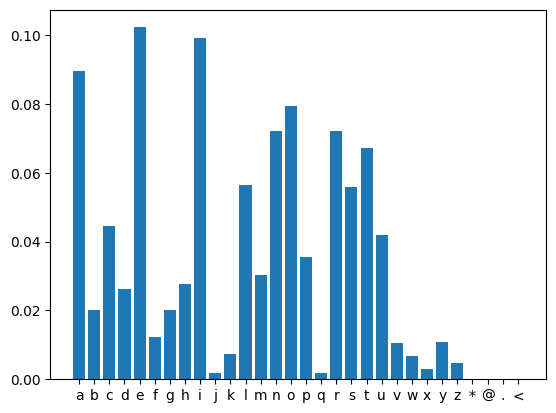

In [7]:
plt.bar([el for el in LETTERS], letter_frequency_normalized_extended);

In [8]:
transition_frequency_normalized = np.array([row / sum(row) for row in transition_frequency])

In [9]:
transition_frequency_normalized_extended = np.array([np.concatenate((row, np.zeros(4))) for row in transition_frequency_normalized])
transition_frequency_normalized_extended = np.concatenate((transition_frequency_normalized_extended, np.zeros((4, 30))))

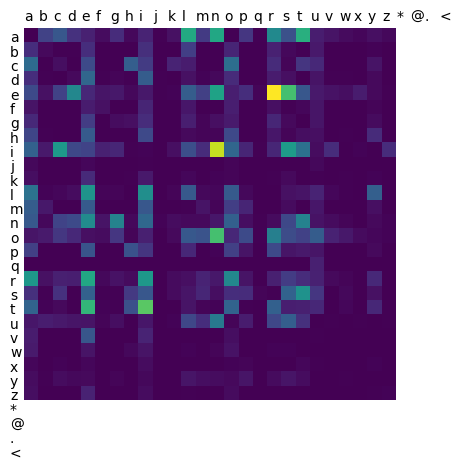

In [10]:
plt.matshow(transition_frequency);
plt.axis('off')
for i in range(len(LETTERS)):
    plt.text(i - 0.5, -1, LETTERS[i])
    plt.text(-1.5, i + 0.5, LETTERS[i])

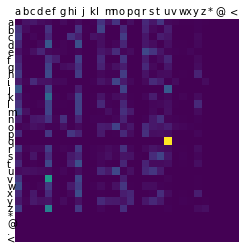

In [174]:
plt.matshow(transition_frequency_normalized_extended);
plt.axis('off')
for i in range(len(LETTERS)):
    plt.text(i - 0.5, -1, LETTERS[i])
    plt.text(-1.5, i + 0.5, LETTERS[i])

# Permutation space

```
* * * * * * * * * * 
* * * * * * * * * #
# * * * * * * * # #
```

|    |    |    |    |    |    |    |    |    |   |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:-:|
| 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9 |
| 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | **26** |
| **27** | 19 | 20 | 21 | 22 | 23 | 24 | 25 | **28** | **29** |

# Optimization

In [190]:
BOARD = [
    [0, 1, 2, 3, 4 , 5, 6, 7, 8, 9],
    [10, 11, 12, 13, 14, 15, 16, 17, 18, 26],
    [27, 19, 20, 21, 22, 23, 24, 25, 28, 29]
]
for row in BOARD:
    print(' '.join(f'{el:2}' for el in row))

 0  1  2  3  4  5  6  7  8  9
10 11 12 13 14 15 16 17 18 26
27 19 20 21 22 23 24 25 28 29


In [197]:
def print_board(permutation):
    for row in BOARD:
        print(' '.join(LETTERS[(permutation + [26, 27, 28, 29])[el]] for el in row))

In [191]:
DIRS = [[1, 0], [0, 1], [0, -1], [-1, 0]]
STATIC_ADJACENCY = np.zeros((len(LETTERS), len(LETTERS)))
for r in range(len(BOARD)):
    for c in range(len(BOARD[r])):
        for dr in DIRS:
            if r + dr[0] >= 0 and r + dr[0] < len(BOARD):
                STATIC_ADJACENCY[BOARD[r][c]][BOARD[r + dr[0]][(c + dr[1]) % len(BOARD[r])]] = 1

for row in STATIC_ADJACENCY:
    print(' '.join(str(el)[0] for el in row))

0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 

In [199]:
def board_adjacency(permutation):
    """
    permutation: [1, 3, 2, 6, 0, 5, ...]
    
    the (i,j) entry of this matrix should tell you, given the keyboard,
    populated with the alphabet according to the permutation,
    if the ith letter of the alphabet is adjacent to the jth letter of the alphabet
    
    the rows and columns correspond to letters, not numbered spots
    
    """
    change_of_basis = np.zeros((len(LETTERS), len(LETTERS)))
    for i, j in enumerate(permutation):
        change_of_basis[j][i] = 1
    for i in range(len(permutation), len(LETTERS)):
        change_of_basis[i][i] = 1
    return np.linalg.inv(change_of_basis) @ STATIC_ADJACENCY @ change_of_basis

In [200]:
a = board_adjacency([0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
print('    ' + ''.join(f'{el:2}' for el in LETTERS))
for i, line in enumerate(a):
    print(f"{LETTERS[i]:2}: " + " ".join(str(el)[0] for el in line))

    a b c d e f g h i j k l m n o p q r s t u v w x y z * @ . < 
a : 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
b : 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
c : 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
d : 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
e : 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
f : 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
g : 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
h : 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
i : 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
j : 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
k : 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
l : 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
m : 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
n : 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
o : 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0

In [201]:
def distance_matrix(permutation):
    ret = np.zeros((len(LETTERS), len(LETTERS)))
    b_adj = board_adjacency(permutation)
    C = copy.deepcopy(b_adj)
    for k in range(1, 8):
        for i in range(len(LETTERS)):
            for j in range(len(LETTERS)):
                if i != j and C[i][j] != 0 and ret[i][j] == 0:
                    ret[i][j] = k
        C = C @ b_adj
    return ret

In [203]:
print_board([0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

a b c e d f g h i j
k l m n o p q r s *
@ t u v w x y z . <


In [202]:
d = distance_matrix([0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
print('    ' + ''.join(f'{el:2}' for el in LETTERS))
for i, line in enumerate(d):
    print(f"{LETTERS[i]:2}: " + " ".join(str(el)[0] for el in line))

    a b c d e f g h i j k l m n o p q r s t u v w x y z * @ . < 
a : 0 1 2 4 3 5 4 3 2 1 1 2 3 4 5 6 5 4 3 3 4 5 6 7 6 5 2 2 4 3
b : 1 0 1 3 2 4 5 4 3 2 2 1 2 3 4 5 6 5 4 2 3 4 5 6 7 6 3 3 5 4
c : 2 1 0 2 1 3 4 5 4 3 3 2 1 2 3 4 5 6 5 3 2 3 4 5 6 7 4 4 6 5
d : 4 3 2 0 1 1 2 3 4 5 5 4 3 2 1 2 3 4 5 5 4 3 2 3 4 5 6 6 6 7
e : 3 2 1 1 0 2 3 4 5 4 4 3 2 1 2 3 4 5 6 4 3 2 3 4 5 6 5 5 7 6
f : 5 4 3 1 2 0 1 2 3 4 6 5 4 3 2 1 2 3 4 6 5 4 3 2 3 4 5 7 5 6
g : 4 5 4 2 3 1 0 1 2 3 5 6 5 4 3 2 1 2 3 7 6 5 4 3 2 3 4 6 4 5
h : 3 4 5 3 4 2 1 0 1 2 4 5 6 5 4 3 2 1 2 6 7 6 5 4 3 2 3 5 3 4
i : 2 3 4 4 5 3 2 1 0 1 3 4 5 6 5 4 3 2 1 5 6 7 6 5 4 3 2 4 2 3
j : 1 2 3 5 4 4 3 2 1 0 2 3 4 5 6 5 4 3 2 4 5 6 7 6 5 4 1 3 3 2
k : 1 2 3 5 4 6 5 4 3 2 0 1 2 3 4 5 4 3 2 2 3 4 5 6 5 4 1 1 3 2
l : 2 1 2 4 3 5 6 5 4 3 1 0 1 2 3 4 5 4 3 1 2 3 4 5 6 5 2 2 4 3
m : 3 2 1 3 2 4 5 6 5 4 2 1 0 1 2 3 4 5 4 2 1 2 3 4 5 6 3 3 5 4
n : 4 3 2 2 1 3 4 5 6 5 3 2 1 0 1 2 3 4 5 3 2 1 2 3 4 5 4 4 6 5
o : 5 4 3 1 2 2 3 4 5 6 4 3 2 1 0 1 2 3

In [206]:
def cost(permutation):
    dist = distance_matrix(permutation)
    c = 0
    for i in range(26):
        s = 0
        for j in range(26):
            s += transition_frequency_normalized[i][j] * dist[i][j]
        c += s * letter_frequency_normalized[i]
    return c

In [219]:
# standard a...z
cost(list(range(26)))

3.300624337113878

In [218]:
# qwerty
qwerty = 'qwertyuiopasdfghjklzxcvbnm'
cost([LETTERS.index(el) for el in qwerty])

3.24382367757219

In [211]:
# random
total = 10000
avg = 0
lowest_cost = 5
for i in range(total):
    permutation = np.random.permutation(26)
    c = cost(permutation)
    if c < lowest_cost:
        print(f'cost: {c:.5}   p: {permutation}')
        lowest_cost = c
    avg += c
print('average: ', avg / total)

cost: 3.4834   p: [21 14  9 19 11 25 12 24 22  5  3 10 20 17  1 15 13  4 23  0  8 18  7  6
 16  2]
cost: 3.3004   p: [18  8 16 21 15  3 24 23 22 17 13  5 10 12  1 25  4  0  6  2 14  7  9 19
 11 20]
cost: 3.2751   p: [ 4 25 24  1 10  2 23 12 14  6 21  5 19  7 13 20 18  8 17 15  0  9  3 11
 16 22]
cost: 3.1487   p: [10  7 15  1 19 24 25  3  4 13 20 17  8 22 21 14  9 11 23  2 12 16  5  0
  6 18]
cost: 3.0283   p: [16  0  5  9 13  7  3 14 23  8  4 17 10 20 12 24 19  1  2 15 11  6 22 25
 18 21]
cost: 3.0043   p: [14  3 17  4  5  0 10 20 23  8 21 22  7 25 24 12  9  6 15  2 11 19 16  1
 18 13]
cost: 2.9759   p: [ 7 17 15 25 14  8 24 11 21 18 10  1  3 22 20  2 16 23 12  4 19  0 13  6
  9  5]
cost: 2.9572   p: [ 5  7 18 20  3 17 11 25 13  9 14  0 24  2 15  6 19  4 23 21 16 10  1 22
  8 12]
cost: 2.9019   p: [ 5 22  7  3 15  1 16  8 21  9 13 20 24  4 12  6  0 14 23 11  2 25 10 19
 17 18]
cost: 2.8955   p: [ 5 10  8 11 13 24  7  1 12 21  0 16  2 18  4  3 20 14 23 15 22 17  9 25
  6 19]
cost: 2.88

In [216]:
best_A = [6,18,25,7,13,19,8,20,16,12,21,15,17,24,14,11,2,5,4,22,23,9,10,1,3,0]
print_board(best_A)
cost(best_A)

g s z h n t i u q m
v p r y o l c f e *
@ w x j k b d a . <


2.775317049191031

In [217]:
best_B = [3, 0, 20, 19, 14, 1, 21, 6, 12, 15, 25, 4, 8, 13, 22, 24, 17, 16, 11, 23, 5, 18, 9, 2, 7, 10]
print_board(best_B)
cost(best_B)

d a u t o b v g m p
z e i n w y r q l *
@ x f s j c h k . <


2.87536332720347

# Niave tree search

In [237]:
def random_swaps(permutation, num_swaps):
    for i in range(num_swaps):
        r1 = random.randint(0, 25)
        r2 = random.randint(0, 25)
        while r1 == r2:
            r2 = random.randint(0, 25)
        permutation[r1], permutation[r2] = permutation[r2], permutation[r1]
    return permutation

In [299]:
np.math.e

2.718281828459045

In [304]:
def optimal_num_children(num_swaps):
    total_number_of_children = 350 ** num_swaps
    # percent of population for half confidence of seeing all children
    # https://www.desmos.com/calculator/d1svxeq9uj
    perc = np.math.log(0.7 * (total_number_of_children + 2), np.math.e) + 0.7
    return int(perc * total_number_of_children)

In [340]:
best_permutation = None
new_best_permutation = list(np.random.permutation(26).data)
best_cost = cost(new_best_permutation)

for num_swaps in [10, 10, 9, 9, 8, 8, 7, 6, 5, 4, 4, 4, 4] + ([3] * 10) + ([2] * 20) + ([1] * 10):
    best_permutation = new_best_permutation.copy()
    for _ in range(100):
        new_permutation = random_swaps(best_permutation.copy(), num_swaps)
        c = cost(new_permutation)
        if c < best_cost:
            best_cost = c
            new_best_permutation = new_permutation.copy()
    print(num_swaps, '  best:', best_cost)

10   best: 3.0107546772476677
10   best: 3.0107546772476677
9   best: 2.9340119068269357
9   best: 2.9340119068269357
8   best: 2.9072813939987086
8   best: 2.8345685871508426
7   best: 2.784215165234267
6   best: 2.775175910854338
5   best: 2.758324441511441
4   best: 2.758324441511441
4   best: 2.70443936076175
4   best: 2.6747097382891987
4   best: 2.6747097382891987
3   best: 2.658465067781606
3   best: 2.6121278476499667
3   best: 2.6121278476499667
3   best: 2.5948135981826757
3   best: 2.5948135981826757
3   best: 2.5942397636300907
3   best: 2.5942397636300907
3   best: 2.5942397636300907
3   best: 2.5942397636300907
3   best: 2.591931943798139
2   best: 2.5688313425680267
2   best: 2.5662105220710276
2   best: 2.547767485951775
2   best: 2.5475341756400987
2   best: 2.537983814857227
2   best: 2.527704079313984
2   best: 2.5257934310825667
2   best: 2.5121049326728535
2   best: 2.4843304442113125
2   best: 2.4834064841704233
2   best: 2.4829513850439446
2   best: 2.47328996983

In [343]:
print(new_best_permutation)
print_board(new_best_permutation)
cost(new_best_permutation)

[4, 11, 23, 12, 13, 19, 21, 6, 15, 9, 1, 3, 17, 22, 24, 7, 8, 14, 16, 5, 25, 20, 10, 0, 2, 18]
e l x m n t v g p j
b d r w y h i o q *
@ f z u k a c s . <


2.419628278105892

# Continuous random swaps

In [353]:
overall_best_c = 3
overall_best_p = None
permutation = list(np.random.permutation(26).data)

while True:
    best_c = 10
    best_p = None
    for _ in range(500):
        p = random_swaps(permutation.copy(), 3)
        c = cost(p)
        if c < best_c:
            best_c = c
            best_p = p
    char = ' '
    if best_c < overall_best_c:
        overall_best_c = best_c
        overall_best_p = best_p
        char = '*'
    print(char, best_p, best_c)
    permutation = best_p

  [21, 1, 14, 8, 11, 6, 2, 22, 18, 10, 0, 13, 24, 9, 5, 17, 25, 20, 16, 4, 23, 12, 19, 3, 15, 7] 3.1915368844720295
* [21, 1, 14, 8, 11, 6, 2, 9, 3, 10, 0, 13, 23, 22, 5, 17, 25, 20, 16, 4, 24, 12, 19, 18, 15, 7] 2.9508780980825033
* [21, 1, 14, 11, 12, 16, 2, 9, 3, 10, 0, 13, 23, 22, 5, 17, 25, 20, 6, 4, 24, 8, 19, 18, 15, 7] 2.7818715007453765
* [21, 1, 14, 11, 16, 12, 2, 7, 3, 10, 0, 13, 23, 22, 5, 17, 25, 15, 6, 4, 24, 8, 19, 18, 20, 9] 2.642649573032529
* [21, 1, 14, 20, 16, 12, 2, 7, 3, 10, 0, 13, 23, 22, 5, 17, 25, 15, 6, 4, 24, 8, 19, 18, 11, 9] 2.615022303697697
* [21, 1, 3, 20, 16, 17, 2, 12, 14, 10, 0, 13, 23, 22, 5, 7, 25, 15, 6, 4, 24, 8, 19, 18, 11, 9] 2.5852718785224575
* [21, 1, 3, 25, 16, 7, 2, 12, 14, 8, 0, 13, 23, 22, 5, 17, 20, 15, 6, 4, 24, 10, 19, 18, 11, 9] 2.55204292141635
* [21, 18, 3, 25, 16, 10, 2, 12, 14, 8, 0, 13, 23, 22, 5, 17, 20, 15, 6, 4, 24, 7, 19, 9, 11, 1] 2.532479419726211
* [21, 1, 3, 25, 16, 20, 2, 12, 14, 9, 0, 13, 23, 22, 5, 17, 10, 15, 6, 4, 24

KeyboardInterrupt: 